In [1]:
from sklearn.metrics import jaccard_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist
from seriate import seriate


In [2]:
# Read data
URs_all_diseases = pd.read_table('../data/UR_analysis/UR_predictions_IMIDs_disease_Pvals.txt', sep = ',')

In [3]:
len(URs_all_diseases['UR'].unique())

506

In [4]:
# Subset to only P1 and only those URs that are significant in at least 1 disease
URs_all_diseases = URs_all_diseases[URs_all_diseases['SP'] == '1.6']
IMID_count = list()
for i in range(len(URs_all_diseases)):
    IMID_count.append(sum(URs_all_diseases.iloc[i,8:] < 0.05))
URs_all_diseases = URs_all_diseases[np.array(IMID_count) > 0]
URs_all_diseases

,SP,UR,CombinedP_Inflamed,CombinedP_Noninflamed,qval_Inflamed,qval_Noninflamed,count_Inflamed,count_Noninflamed,AD_active,AD_inactive,...,JM_inactive,PSO_active,PSO_inactive,RA_active,SS_active,SSc_active,UC_active,UC_inactive,at_risk_T1D_inactive,lupus_active
6,1.6,ACKR1,1.573064e-01,1.000000e+00,3.826780e-01,1.000000,0,0,1.000000e+00,1.000000,...,1.000000,4.058199e-03,1.000000,1.000000,1.000000,0.005087,2.420096e-01,1.000000e+00,1.000000,1.000000
31,1.6,ACKR2,6.503332e-01,1.000000e+00,1.000000e+00,1.000000,1,0,1.000000e+00,1.000000,...,1.000000,8.546627e-10,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000
56,1.6,ACKR3,1.000000e+00,5.693709e-01,1.000000e+00,1.000000,0,1,1.000000e+00,1.000000,...,1.000000,1.000000e+00,1.000000,0.902528,0.789113,1.000000,1.000000e+00,1.000000e+00,0.210526,1.000000
131,1.6,ADIPOR2,1.000000e+00,5.273987e-01,1.000000e+00,1.000000,0,1,1.000000e+00,1.000000,...,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000e+00,9.515305e-03,1.000000,1.000000
156,1.6,ADORA2A,8.276648e-03,1.106156e-03,2.251604e-02,0.006219,1,2,1.000000e+00,0.000003,...,1.000000,7.475232e-09,1.000000,0.069253,1.000000,0.481255,1.000000e+00,1.055382e-02,1.000000,0.032210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12531,1.6,VIPR1,9.910544e-01,1.000000e+00,1.000000e+00,1.000000,1,0,1.000000e+00,1.000000,...,1.000000,1.865991e-06,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000
12556,1.6,WNT1,7.158949e-03,1.875024e-06,1.979469e-02,0.000015,1,1,5.863950e-15,1.000000,...,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000e+00,4.033401e-11,1.000000,1.000000
12581,1.6,WNT3A,3.693474e-18,1.349989e-07,1.714585e-17,0.000001,3,3,2.079523e-22,1.000000,...,0.005036,3.111924e-12,0.009958,0.299931,1.000000,1.000000,1.000000e+00,1.575435e-08,1.000000,0.999973
12606,1.6,WNT5A,2.915632e-35,6.089853e-07,1.967080e-34,0.000005,9,2,1.000000e+00,1.000000,...,0.009094,5.642659e-11,1.000000,0.000005,1.000000,0.000829,1.882942e-08,7.985781e-10,1.000000,0.006020


In [5]:
URs_all_diseases.sort_values(by = 'JM_active').iloc[:15,:13]



,SP,UR,CombinedP_Inflamed,CombinedP_Noninflamed,qval_Inflamed,qval_Noninflamed,count_Inflamed,count_Noninflamed,AD_active,AD_inactive,CD_active,CD_inactive,JM_active
6856,1.6,IL27,9.504259e-222,1.000000e+00,4.809155e-220,1.000000e+00,18,0,1.000000e+00,1.000000e+00,3.688946e-70,1.000000e+00,0.000037
5556,1.6,IFNB1,6.730573e-115,8.548332e-09,1.174369e-113,8.318184e-08,15,2,1.401574e-41,1.000000e+00,8.143262e-16,2.670705e-03,0.000331
5731,1.6,IFNL4,1.371603e-26,1.000000e+00,7.626713e-26,1.000000e+00,12,0,1.149806e-05,1.000000e+00,6.487074e-07,1.000000e+00,0.000476
11456,1.6,TLR7,2.962273e-171,1.000000e+00,8.817118e-170,1.000000e+00,18,0,1.000000e+00,1.000000e+00,7.119950e-55,1.000000e+00,0.001600
11506,1.6,TLR9,2.170062e-110,1.924509e-05,3.431410e-109,1.391145e-04,17,1,1.000000e+00,1.000000e+00,2.345504e-30,1.000000e+00,0.001600
11531,1.6,TNF,0.000000e+00,1.204311e-109,0.000000e+00,3.046907e-107,21,4,4.676321e-215,1.000000e+00,1.697320e-170,4.290549e-21,0.001871
3456,1.6,FAS,3.430265e-164,2.922945e-17,9.642857e-163,5.100035e-16,20,3,8.214657e-56,1.000000e+00,2.789683e-35,2.402241e-05,0.002800
6406,1.6,IL1B,0.000000e+00,3.201307e-53,0.000000e+00,2.699769e-51,17,3,4.522437e-108,1.000000e+00,4.243776e-122,1.142630e-16,0.002988
11356,1.6,TLR3,1.281810e-136,8.852857e-07,2.819982e-135,7.343517e-06,16,1,5.186302e-34,1.000000e+00,1.527135e-30,1.000000e+00,0.005103
5606,1.6,IFNG,0.000000e+00,3.591460e-69,0.000000e+00,6.057596e-67,21,3,3.891269e-170,1.000000e+00,1.444525e-96,2.950862e-19,0.010581


In [6]:
#IMID summary
IMID_count = list()
for disease in URs_all_diseases.columns[8:]:
    IMID_count.append(sum(URs_all_diseases[disease] < 0.05))


In [7]:
print('min: ' + str(np.min(IMID_count)))
print('max: ' + str(np.max(IMID_count)))
print('median: ' + str(np.median(IMID_count)))

min: 0
max: 218
median: 79.0


In [122]:
#UR summary
UR_count = list()
for i in range(len(URs_all_diseases)):
    UR_count.append(sum(URs_all_diseases.iloc[i,8:] < 0.05))
    #UR_count.append(sum(URs_all_diseases.iloc[i,[8,10,12,14,16,17,18,19,22]] < 0.05))


In [123]:
print('min: ' + str(np.min(UR_count)))
print('max: ' + str(np.max(UR_count)))
print('median: ' + str(np.median(UR_count)))
print('Percentage of URs that are only expressed in one disease: ' + \
      str(round(sum(np.array(UR_count) == 1)/len(UR_count),2)))

min: 1
max: 12
median: 2.0
Percentage of URs that are only expressed in one disease: 0.34


In [124]:
#UR summary
UR_count = list()
for i in range(len(URs_all_diseases)):
    UR_count.append(sum(URs_all_diseases.iloc[i,[8,10,12,14,16,17,18,19,22]] < 0.05))

In [125]:
np.array(URs_all_diseases['UR'][np.array(UR_count) == 8])

array(['AR', 'ESR2', 'FAS', 'IFNG', 'IL1A', 'IL1B', 'TLR3', 'TNF'],
      dtype=object)

In [126]:
# Compute jaccard score/intersections between URs
UR_table = list()
for i in range(len(URs_all_diseases)):
    UR_row = list()
    for j in range(len(URs_all_diseases)):
        UR_row.append(sum((URs_all_diseases.iloc[i,8:] < 0.05) & (URs_all_diseases.iloc[j,8:] < 0.05)))
        
    UR_table.append(UR_row)
UR_table = pd.DataFrame(UR_table)
UR_table.index = URs_all_diseases['UR']
UR_table.columns = URs_all_diseases['UR']

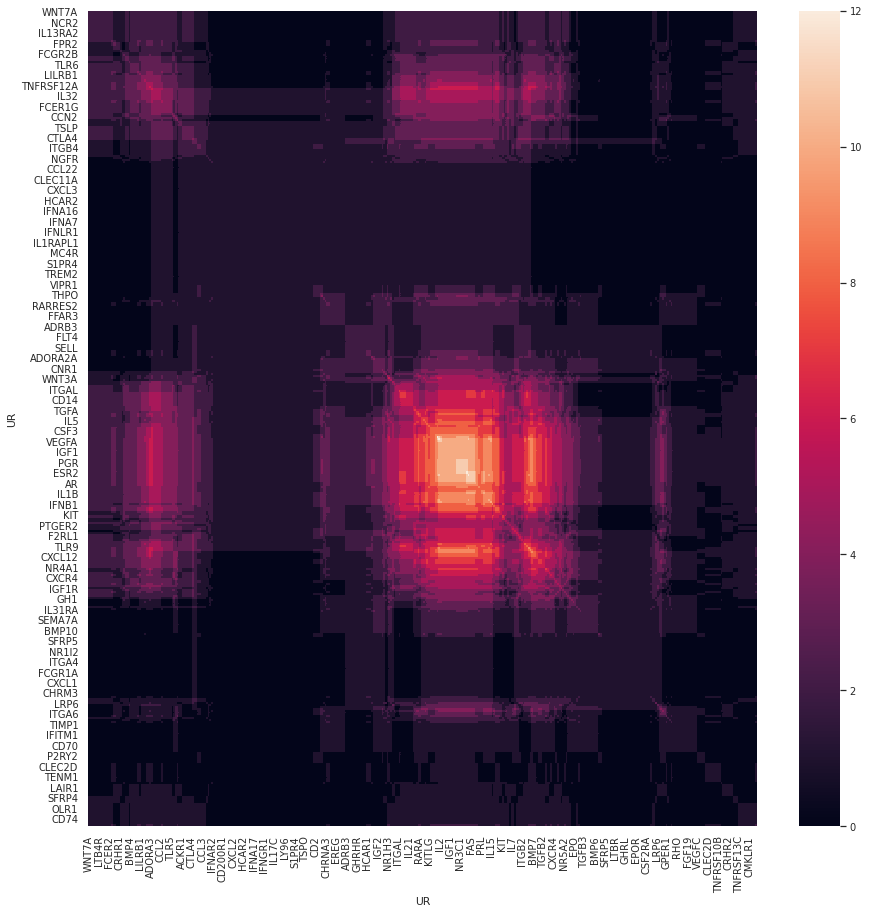

In [127]:
# Clustering and plotting the jaccard index
elements = UR_table
ord1 = seriate(pdist(elements))   
UR_table_sorted = UR_table.iloc[ord1, ord1]


fig, ax = plt.subplots(figsize=(15, 15)) 
sns.set(font_scale=0.9)
result = sns.heatmap(UR_table_sorted, vmin = 0, vmax = 12)


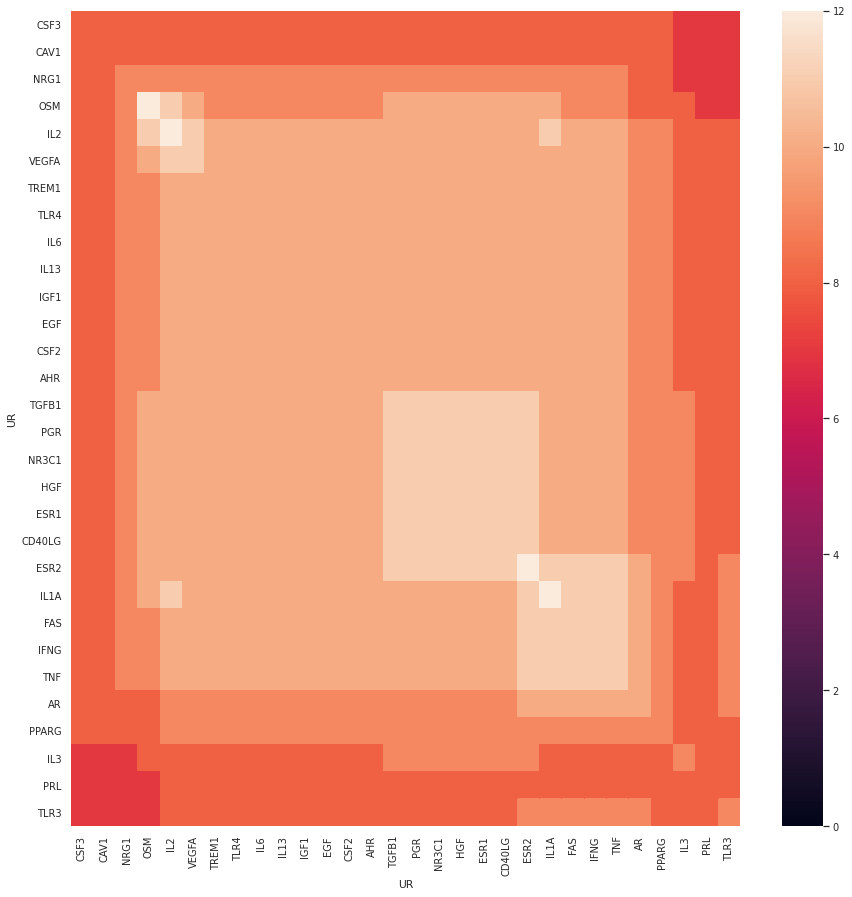

In [128]:
# Clustering and plotting the subset of URs

fig, ax = plt.subplots(figsize=(15, 15)) 

sns.set(font_scale=0.9)
result = sns.heatmap(UR_table_sorted.iloc[200:230,200:230], vmin = 0, vmax = 12)

# Analogically the same analysis for diseases

In [132]:
UR_table = list()
for i in range(15):
    UR_row = list()
    for j in range(15):
        UR_row.append(jaccard_score(URs_all_diseases.iloc[:,i+8] < 0.05, URs_all_diseases.iloc[:,j+8] < 0.05))

    UR_table.append(UR_row)
UR_table = pd.DataFrame(UR_table)
UR_table.index = URs_all_diseases.columns[8:]
UR_table.columns = URs_all_diseases.columns[8:]

/opt/conda/3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


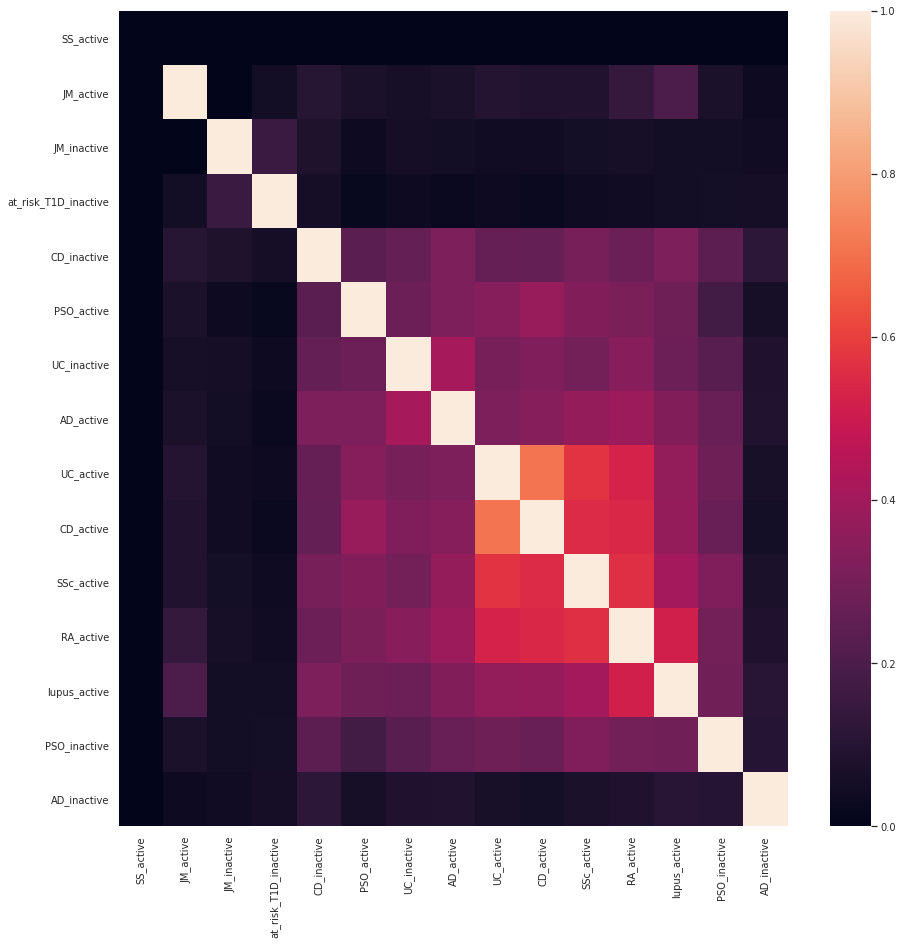

In [133]:
#clustering
elements = UR_table
ord1 = seriate(pdist(elements))   
#UR_table = UR_table.iloc[ord1, ord1]
UR_table = UR_table.iloc[[9, 4, 5, 13, 3, 6, 12, 0, 11, 2, 10, 8, 14, 7, 1],\
                         [9, 4, 5, 13, 3, 6, 12, 0, 11, 2, 10, 8, 14, 7, 1]]


fig, ax = plt.subplots(figsize=(15, 15)) 
sns.set(font_scale=0.9)
result = sns.heatmap(UR_table, vmin = 0, vmax = UR_table.max().max())